In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dataset.zip to dataset (3).zip
User uploaded file "dataset.zip" with length 570692946 bytes


In [0]:
import zipfile
zip_ref = zipfile.ZipFile('dataset (2).zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [1]:
import os
os.environ['QT_QPA_PLATFORM']='offscreen'

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras

from keras import backend as K
K.set_image_dim_ordering('th')

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.activations import relu, sigmoid

from keras.layers import Conv2D, MaxPooling2D

#from keras.preprocessing.image import ImageDataGenerator, load_data
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from sklearn.preprocessing import StandardScaler

#Imports using API Keras that utilizes TensorFlow 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [2]:
training_data = 'dataset/training'
validation_data = 'dataset/validation'
img_size = 80
batch_size = 64
epochs = 75

In [4]:
#AlexNet in Keras 
#input image is 80x80
model = Sequential()

model.add(Conv2D(96, (7, 7), input_shape=(3, img_size, img_size))) 
model.add(Activation('relu'))
model.add(BatchNormalization(momentum=0.3))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(256, (7, 7)))   
model.add(Activation('relu'))
model.add(BatchNormalization(momentum=0.3))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(256, (3, 3)))   
model.add(Activation('relu'))
model.add(BatchNormalization(momentum=0.3))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization(momentum=0.3))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer= adam, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 96, 74, 74)        14208     
_________________________________________________________________
activation_6 (Activation)    (None, 96, 74, 74)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 96, 74, 74)        296       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 96, 24, 24)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 256, 18, 18)       1204480   
_________________________________________________________________
activation_7 (Activation)    (None, 256, 18, 18)       0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 256, 18, 18)       72        
__________

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, width_shift_range=0.2, rotation_range=40, 
                                   shear_range=0.4, zoom_range=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_batches = train_datagen.flow_from_directory(training_data, target_size=(img_size, img_size), class_mode='binary', batch_size=batch_size)
validation_batches = test_datagen.flow_from_directory(validation_data, target_size=(img_size, img_size), class_mode='binary', batch_size=batch_size)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [6]:
from keras.callbacks import ModelCheckpoint
filepath = 'alexnet_best_weights.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

alexnet_model = model.fit_generator(
        train_batches,
        steps_per_epoch=20000 // batch_size,
        epochs=epochs,
        validation_data=validation_batches,
        validation_steps=5000 // batch_size,
        callbacks=callbacks_list)

Epoch 1/75
312/312 [==============================] - 396s 1s/step - loss: 0.7507 - acc: 0.5560 - val_loss: 0.6556 - val_acc: 0.6092

Epoch 00001: val_loss improved from inf to 0.65563, saving model to alexnet_best_weights.hdf5
Epoch 2/75
312/312 [==============================] - 113s 361ms/step - loss: 0.6711 - acc: 0.6074 - val_loss: 0.6318 - val_acc: 0.6378

Epoch 00002: val_loss improved from 0.65563 to 0.63178, saving model to alexnet_best_weights.hdf5
Epoch 3/75
312/312 [==============================] - 113s 361ms/step - loss: 0.6248 - acc: 0.6576 - val_loss: 0.5717 - val_acc: 0.7037

Epoch 00003: val_loss improved from 0.63178 to 0.57168, saving model to alexnet_best_weights.hdf5
Epoch 4/75
312/312 [==============================] - 112s 359ms/step - loss: 0.5951 - acc: 0.6845 - val_loss: 0.5557 - val_acc: 0.7109

Epoch 00004: val_loss improved from 0.57168 to 0.55565, saving model to alexnet_best_weights.hdf5
Epoch 5/75
312/312 [==============================] - 112s 359ms/st

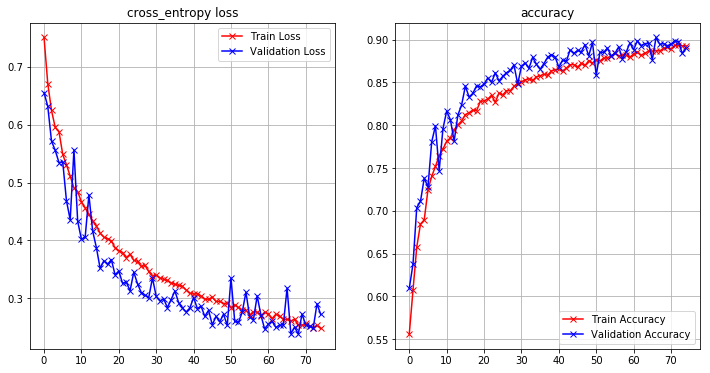

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_loss_accuracy(alexnet_model):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(alexnet_model.history["loss"],'r-x', label="Train Loss")
    ax.plot(alexnet_model.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(alexnet_model.history["acc"],'r-x', label="Train Accuracy")
    ax.plot(alexnet_model.history["val_acc"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(alexnet_model)

In [6]:
#Upload test set (files are from google drive)
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  

Saving test1.zip to test1.zip
User uploaded file "test1.zip" with length 284479986 bytes


In [0]:
import zipfile
zip_ref = zipfile.ZipFile('test1.zip', 'r')
zip_ref.extractall()
zip_ref.close()

0.00421904
cat


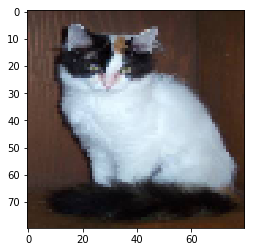

0.61035
dog


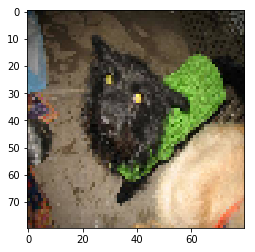

0.0437657
cat


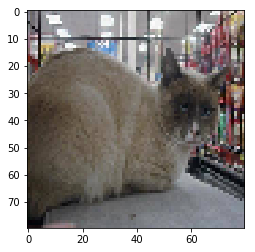

0.999999
dog


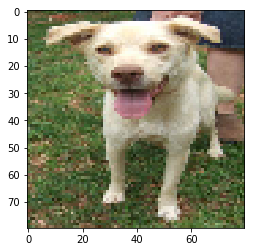

0.0216842
cat


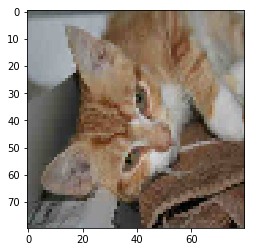

0.252307
cat


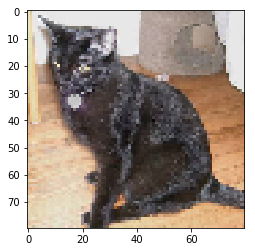

0.496786
cat


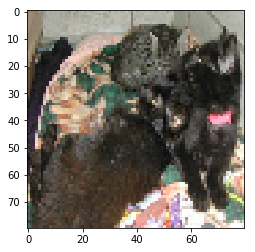

0.504152
dog


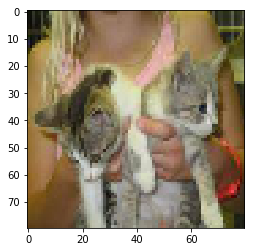

0.998227
dog


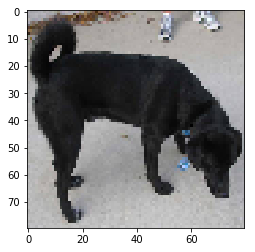

0.946998
dog


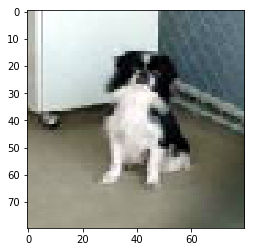

In [12]:
# Prediction using the test data
# Take screenshot of all 20 results and include it in your PPT
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

list_of_imgs = []
img_dir = "test1"
i=0
for img in os.listdir(img_dir):
    img_name = os.path.join(img_dir, img)
    if not img.endswith(".jpg"):
        continue
    img = image.load_img(img_name, target_size=(80, 80))
    test_image = image.img_to_array(img) / 255
    x = model.predict(np.array([test_image]))
    if(x[0][0] < 0.5):
        print(x[0][0])
        print("cat")
    else:
        print(x[0][0])
        print("dog")
    plt.imshow(img)
    plt.show(img)
    i+=1
    if i == 10:
      break